# Project on Fraud Detection of  Credit Cards

## Objective: Classify a person as 'fraud' or 'not fraud' by observing various features of the person, and using various classifying tools

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

### Observing the data

In [2]:
df = pd.read_csv('C:\\Users\\jaisw\\Desktop\\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284806 entries, 0 to 284805
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284806 non-null  float64
 1   V1      284806 non-null  float64
 2   V2      284806 non-null  float64
 3   V3      284806 non-null  float64
 4   V4      284806 non-null  float64
 5   V5      284806 non-null  float64
 6   V6      284806 non-null  float64
 7   V7      284806 non-null  float64
 8   V8      284806 non-null  float64
 9   V9      284806 non-null  float64
 10  V10     284806 non-null  float64
 11  V11     284806 non-null  float64
 12  V12     284806 non-null  float64
 13  V13     284806 non-null  float64
 14  V14     284806 non-null  float64
 15  V15     284806 non-null  float64
 16  V16     284806 non-null  float64
 17  V17     284806 non-null  float64
 18  V18     284806 non-null  float64
 19  V19     284806 non-null  float64
 20  V20     284806 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,284806.000000,284806.000000,...,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,2.848060e+05,284806.000000,284806.000000
mean,94813.585781,0.000002,6.661837e-07,-0.000002,0.000002,4.405007e-08,0.000002,-0.000006,0.000001,-0.000002,...,-9.166149e-07,-0.000002,-0.000001,-3.088756e-08,0.000002,0.000003,8.483873e-09,-4.792707e-08,88.349168,0.001727
std,47488.004530,1.958699,1.651311e+00,1.516257,1.415871,1.380249e+00,1.332273,1.237092,1.194355,1.098634,...,7.345251e-01,0.725702,0.624461,6.056481e-01,0.521278,0.482225,4.036332e-01,3.300838e-01,250.120432,0.041527
min,0.000000,-56.407510,-7.271573e+01,-48.325589,-5.683171,-1.137433e+02,-26.160506,-43.557242,-73.216718,-13.434066,...,-3.483038e+01,-10.933144,-44.807735,-2.836627e+00,-10.295397,-2.604551,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.250000,-0.920374,-5.985522e-01,-0.890368,-0.848642,-6.915995e-01,-0.768296,-0.554080,-0.208628,-0.643098,...,-2.283974e-01,-0.542351,-0.161846,-3.545895e-01,-0.317142,-0.326979,-7.083961e-02,-5.295995e-02,5.600000,0.000000
50%,84691.500000,0.018109,6.549621e-02,0.179846,-0.019845,-5.433621e-02,-0.274186,0.040097,0.022358,-0.051429,...,-2.945020e-02,0.006781,-0.011196,4.097671e-02,0.016596,-0.052134,1.342244e-03,1.124381e-02,22.000000,0.000000
75%,139320.000000,1.315645,8.037257e-01,1.027198,0.743348,6.119267e-01,0.398567,0.570426,0.327346,0.597140,...,1.863701e-01,0.528548,0.147641,4.395270e-01,0.350716,0.240955,9.104579e-02,7.828043e-02,77.160000,0.000000
max,172788.000000,2.454930,2.205773e+01,9.382558,16.875344,3.480167e+01,73.301626,120.589494,20.007208,15.594995,...,2.720284e+01,10.503090,22.528412,4.584549e+00,7.519589,3.517346,3.161220e+01,3.384781e+01,25691.160000,1.000000


 There are 30 columns. The column 'Class' represents the response variable with 0 means 'not fraud' and 1 means 'fraud'. Rest of the 29 columns represent 29 predictor variables.

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There is no null values or missing data.

### Checking the proportion of classes in the response variable.

In [6]:
print('No Frauds:', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds:', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds: 99.83 % of the dataset
Frauds: 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

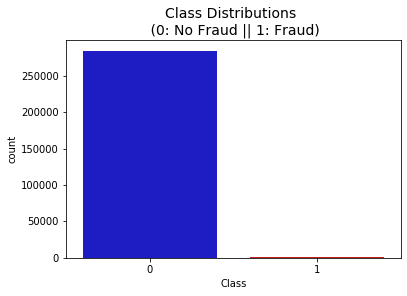

In [7]:
colors = ["#0101DF", "#DF0101"]
sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

We observe that 99.83% of the data belong to one 'no fraud' category and rest 0.17% belong to the 'fraud' category. So, the data is highly imbalanced. We will deal with this problem later on.

### Checking the distribution, and scaling the unscaled predictor variables to make the dataset more consistent.

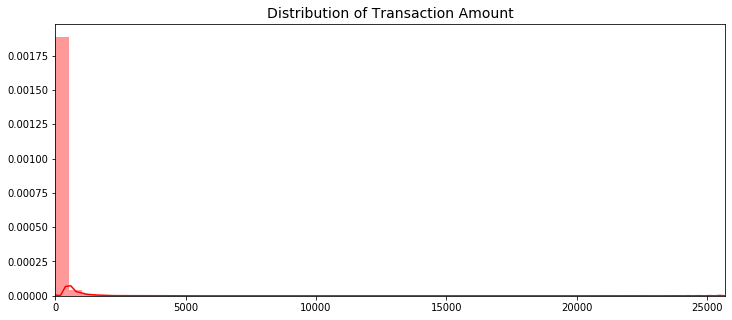

In [8]:
plt.figure(figsize=(12,5))
amount_val = df['Amount'].values
sns.distplot(amount_val, color='r')
plt.title('Distribution of Transaction Amount', fontsize=14)
plt.xlim([min(amount_val), max(amount_val)])
plt.show()

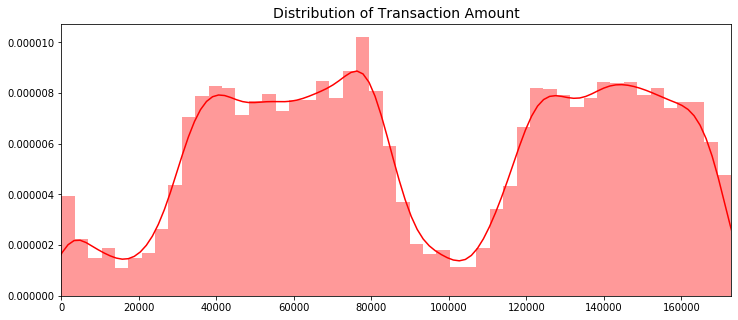

In [9]:
plt.figure(figsize=(12,5))
time_val = df['Time'].values
sns.distplot(time_val, color='r')
plt.title('Distribution of Transaction Amount', fontsize=14)
plt.xlim([min(time_val), max(time_val)])
plt.show()

In [10]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df = df.drop(['Time','Amount'], axis=1)

In [11]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783399,-0.994981,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269843,-0.994981,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.984069,-0.994969,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418390,-0.994969,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670626,-0.994957,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


All the variables are scaled now.

### Ckecking the relationship between variables using correlation matrix.

In [12]:
round(df.corr(),3)

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
scaled_amount,1.000,-0.011,-0.228,-0.531,-0.211,0.099,-0.386,0.216,0.397,-0.103,...,0.339,0.106,-0.065,-0.113,0.005,-0.048,-0.003,0.029,0.010,0.006
scaled_time,-0.011,1.000,0.117,-0.011,-0.420,-0.105,0.173,-0.063,0.085,-0.037,...,-0.051,0.045,0.144,0.051,-0.016,-0.233,-0.041,-0.005,-0.009,-0.012
V1,-0.228,0.117,1.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,...,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.101
V2,-0.531,-0.011,-0.000,1.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,...,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.091
V3,-0.211,-0.420,0.000,0.000,1.000,0.000,0.000,0.000,-0.000,0.000,...,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.193
V4,0.099,-0.105,-0.000,-0.000,0.000,1.000,-0.000,-0.000,0.000,-0.000,...,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.133
V5,-0.386,0.173,-0.000,-0.000,0.000,-0.000,1.000,-0.000,0.000,-0.000,...,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.095
V6,0.216,-0.063,-0.000,-0.000,0.000,-0.000,-0.000,1.000,0.000,-0.000,...,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.044
V7,0.397,0.085,0.000,0.000,-0.000,0.000,0.000,0.000,1.000,0.000,...,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.187
V8,-0.103,-0.037,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.020


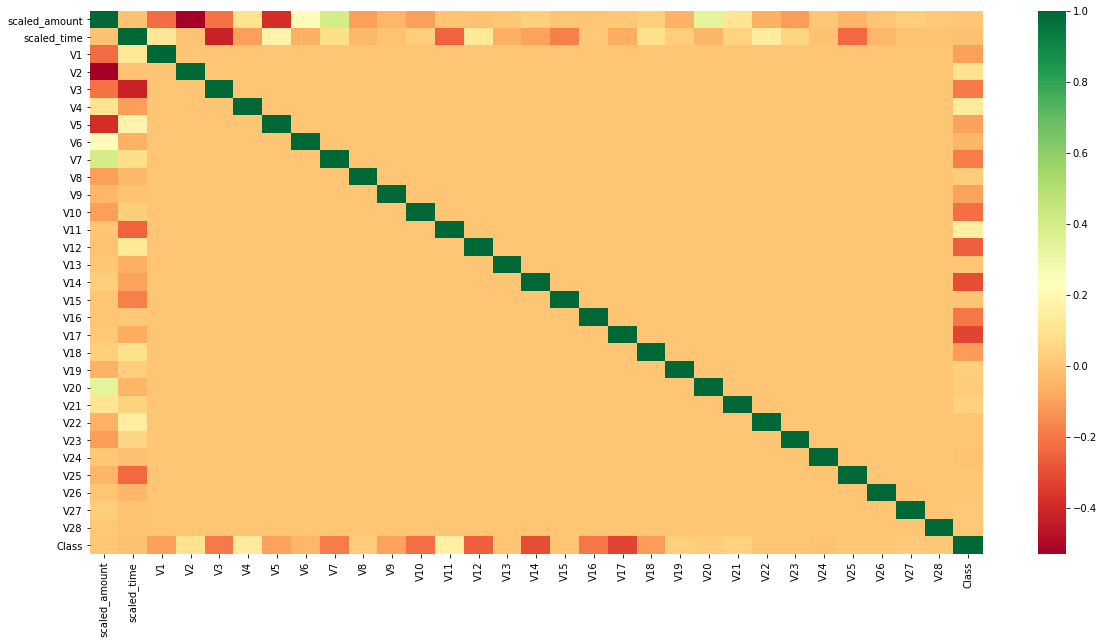

In [13]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), cmap='RdYlGn')
plt.show()

## Dealing with the imbalanced dataset.

In [14]:
number_fraud = len(df[df['Class']==1])
print('Total no. of fraud cases is', number_fraud)

number_no_fraud = len(df[df['Class']==0])
print('Total no. of no fraud cases is', number_no_fraud)

Total no. of fraud cases is 492
Total no. of no fraud cases is 284314


In [15]:
index_non_fraud = df[df['Class']==0].index
index_fraud = df[df['Class']==1].index
np.random.seed(42)
random_indices = np.random.choice(index_non_fraud, number_fraud,replace='False')
under_sample_indices = np.concatenate([index_fraud,random_indices])
under_sample_indices

array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
      

In [16]:
new_df = df.iloc[under_sample_indices]
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
541,-0.307434,-0.990211,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1
623,7.084964,-0.989435,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1
4920,3.045416,-0.942560,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1
6108,0.517049,-0.912907,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1
6329,-0.293460,-0.906645,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1


In [17]:
Counter(new_df['Class'])

Counter({1: 492, 0: 492})

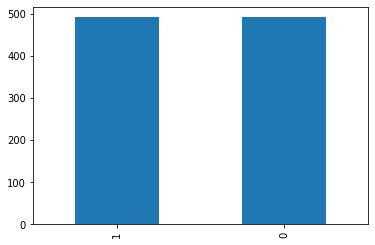

In [18]:
new_df_class_counts = pd.value_counts(new_df['Class'])
new_df_class_counts.plot(kind='bar')

Our data is now balanced with 492 'fraud' cases, and 492 'no fraud' cases.

## Making Predictions on new dataset.

### Separating the Predictors and Response variables

In [19]:
X = new_df.loc[:, new_df.columns!='Class'].values
y = new_df.loc[:, new_df.columns=='Class'].values

In [20]:
print(X)

[[-0.30743432 -0.99021074 -2.31222654 ...  0.1778398   0.261145
  -0.14327587]
 [ 7.08496367 -0.98943535 -3.04354062 ... -0.14536172 -0.25277312
   0.03576422]
 [ 3.04541643 -0.94255966 -2.30334957 ... -0.54262789  0.03956599
  -0.1530288 ]
 ...
 [ 1.44675797 -0.53335487  0.81374413 ... -0.18947455  0.09136334
   0.064843  ]
 [ 1.10620458 -0.34082385 -1.83332869 ...  0.61740887  0.11200632
  -0.033303  ]
 [-0.09334824 -0.25627139 -0.93186401 ... -0.37049063 -0.6529011
  -0.08877676]]


In [21]:
print(y)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]


### Splitting the data into training and test set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Using various classifiers to make predictions

### Logistic Classifier

In [23]:
from sklearn.linear_model import LogisticRegression
classifier_log = LogisticRegression(random_state = 0)
classifier_log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_pred_log = classifier_log.predict(X_test)
print(np.concatenate((y_pred_log.reshape(len(y_pred_log),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

In [25]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        98
           1       0.98      0.94      0.96        99

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



In [26]:
print('Confusion matrix for Logistic:')
cm_log = confusion_matrix(y_test, y_pred_log)
print(cm_log)
print('Final accuracy score for logistic is',np.round(accuracy_score(y_test, y_pred_log), 4))

Confusion matrix for Logistic:
[[96  2]
 [ 6 93]]
Final accuracy score for logistic is 0.9594


### Random_forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion ='gini',random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [28]:
y_pred_rf = classifier_rf.predict(X_test)
print(np.concatenate((y_pred_rf.reshape(len(y_pred_rf),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

In [29]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        98
           1       0.97      0.94      0.95        99

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



In [30]:
print('Confusion matrix for Random_forest:')
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
print('Final accuracy score for random_forest is',np.round(accuracy_score(y_test, y_pred_rf), 4))

Confusion matrix for Random_forest:
[[95  3]
 [ 6 93]]
Final accuracy score for random_forest is 0.9543


## The final accuracy is very good with Random_forest classifier giving an accuracy score of 95.43% and Logistic_regression giving an accuracy score of 95.94%.